<a href="https://colab.research.google.com/github/ayush1501garg/Predicting-Customer-Churn/blob/main/Predicting_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [18]:
df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv")

In [19]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [21]:
df.duplicated("CustomerId").sum()

0

In [22]:
df= df.set_index("CustomerId")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


## **ENCODING**

In [24]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [25]:
df.replace({"Geography": {"France":2, "Germany":1, "Spain": 0}}, inplace= True)

In [26]:
df['Gender'].value_counts()


Male      5457
Female    4543
Name: Gender, dtype: int64

In [28]:
df.replace({"Gender": {"Male": 0, "Female": 1}}, inplace =True)

In [30]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [31]:
df.replace({"Num Of Products": {1:0 , 2:1, 3:1, 4:1}}, inplace= True)

In [32]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [33]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [34]:
df.loc[(df['Balance']==0), "Churn"].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [35]:
df['Zero Balance']= np.where(df['Balance']>0, 1, 0)

<Axes: >

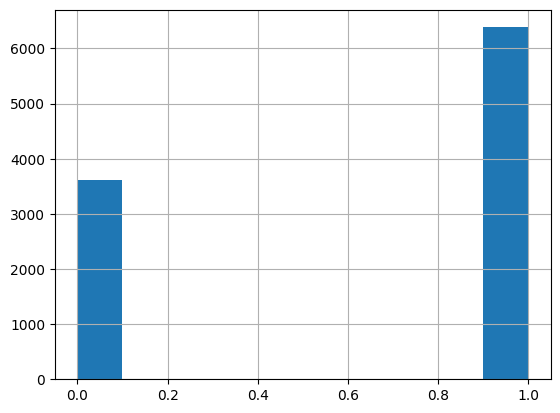

In [36]:
df['Zero Balance'].hist()

In [38]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

### Define Labels and Features

In [39]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [41]:
X= df.drop(['Surname', 'Churn'], axis=1)

In [42]:
Y = df['Churn']

## Sampling

## Random Under Sampling

In [43]:
from imblearn.under_sampling import RandomUnderSampler

In [44]:
rus = RandomUnderSampler(random_state= 2529)

In [45]:
X_rus, Y_rus = rus.fit_resample(X, Y)

In [47]:
X_rus.shape, Y_rus.shape

((4074, 11), (4074,))

In [49]:
Y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [50]:
Y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

<Axes: ylabel='Frequency'>

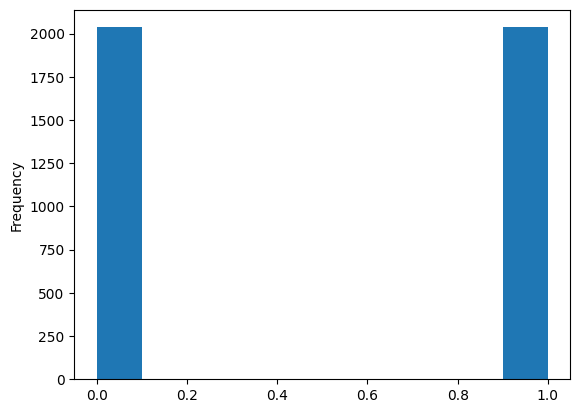

In [51]:
Y_rus.plot(kind='hist')

### Random Over Sampling

In [53]:
from imblearn.over_sampling import RandomOverSampler


In [55]:
ros= RandomOverSampler(random_state= 2529)

In [56]:
X_ros, Y_ros = ros.fit_resample(X, Y)

In [58]:
X_ros.shape, Y_ros.shape

((15926, 11), (15926,))

In [59]:
Y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [60]:
Y_ros.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

Train Test Split

In [61]:
from sklearn.model_selection import train_test_split

In [68]:
X_train , X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.3)

In [69]:
X_train_ros , X_test_ros, Y_train_ros, Y_test_ros=train_test_split(X_ros, Y_ros, test_size=0.3)

In [70]:
X_train_rus , X_test_rus, Y_train_rus, Y_test_rus=train_test_split(X_rus, Y_rus, test_size=0.3)


### Standardize Data

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
sc= StandardScaler()

## Standardize Raw Data

In [71]:
X_train[['CreditScore', 'Age', 'Tenure', 'Balance' ,'Estimated Salary']]= sc.fit_transform(X_train[['CreditScore', 'Age', 'Tenure', 'Balance' ,'Estimated Salary']])

In [72]:
X_test[['CreditScore', 'Age', 'Tenure', 'Balance' ,'Estimated Salary']]= sc.fit_transform(X_test[['CreditScore', 'Age', 'Tenure', 'Balance' ,'Estimated Salary']])

Standardize RuS

In [73]:
X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance' ,'Estimated Salary']]= sc.fit_transform(X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance' ,'Estimated Salary']])

In [74]:
X_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance' ,'Estimated Salary']]= sc.fit_transform(X_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance' ,'Estimated Salary']])

Standardize RoS

In [75]:
X_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance' ,'Estimated Salary']]= sc.fit_transform(X_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance' ,'Estimated Salary']])

In [76]:
X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance' ,'Estimated Salary']]= sc.fit_transform(X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance' ,'Estimated Salary']])


# SVC

In [78]:
from sklearn.svm import SVC

In [79]:
svc = SVC()

In [80]:
svc.fit(X_train, Y_train)

SVC()

In [85]:
Y_pred = svc.predict(X_test)

# Model Accuracy

In [82]:
from sklearn.metrics import confusion_matrix, classification_report

In [86]:
confusion_matrix(Y_test, Y_pred)

array([[2359,   31],
       [ 447,  163]])

In [87]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2390
           1       0.84      0.27      0.41       610

    accuracy                           0.84      3000
   macro avg       0.84      0.63      0.66      3000
weighted avg       0.84      0.84      0.81      3000



HyperParameter Tuning

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
param_grid = {'C':[0.1, 1, 10], 'gamma':[1, 0.1, 0.01], 'kernel': ['rbf'], 'class_weight': ['balanced']}

In [90]:
grid = GridSearchCV(SVC(), param_grid, refit= True, verbose=2, cv=2)

In [92]:
grid.fit(X_train, Y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [93]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [112]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [116]:
grid_pred = grid.predict(X_test)

In [95]:
confusion_matrix(Y_test, grid_pred)


array([[2135,  255],
       [ 391,  219]])

In [96]:
print(classification_report(Y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2390
           1       0.46      0.36      0.40       610

    accuracy                           0.78      3000
   macro avg       0.65      0.63      0.64      3000
weighted avg       0.77      0.78      0.77      3000



## Model With RUS


In [97]:
svc_rus = SVC()

In [98]:
svc_rus.fit(X_train_rus, Y_train_rus)

SVC()

In [101]:
Y_pred_rus = svc_rus.predict(X_test_rus)

In [102]:
confusion_matrix(Y_test_rus, Y_pred_rus)

array([[454, 142],
       [195, 432]])

In [103]:
print(classification_report(Y_test_rus, Y_pred_rus))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73       596
           1       0.75      0.69      0.72       627

    accuracy                           0.72      1223
   macro avg       0.73      0.73      0.72      1223
weighted avg       0.73      0.72      0.72      1223



## HyperParameter

In [109]:
param_grid_rus = {'C':[0.1, 1, 10], 'gamma':[1, 0.1, 0.01], 'kernel': ['rbf'], 'class_weight': ['balanced']}


In [110]:
grid_rus = GridSearchCV(SVC(), param_grid_rus, refit= True, verbose=2, cv=2)


In [111]:
grid_rus.fit(X_train_rus, Y_train_rus)


Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [114]:
print(grid_rus.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=0.01)


In [117]:
grid_pred_rus = grid.predict(X_test_rus)


In [118]:
confusion_matrix(Y_test_rus, grid_pred_rus)


array([[580,  16],
       [141, 486]])

In [119]:

print(classification_report(Y_test_rus, grid_pred_rus))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88       596
           1       0.97      0.78      0.86       627

    accuracy                           0.87      1223
   macro avg       0.89      0.87      0.87      1223
weighted avg       0.89      0.87      0.87      1223



## Oversampling

In [104]:
svc_ros = SVC()

In [105]:
svc_rus.fit(X_train_ros, Y_train_ros)

SVC()

In [106]:
Y_pred_ros = svc_rus.predict(X_test_ros)


In [107]:
confusion_matrix(Y_test_ros, Y_pred_ros)


array([[1838,  541],
       [ 591, 1808]])

In [108]:
print(classification_report(Y_test_ros, Y_pred_ros))


              precision    recall  f1-score   support

           0       0.76      0.77      0.76      2379
           1       0.77      0.75      0.76      2399

    accuracy                           0.76      4778
   macro avg       0.76      0.76      0.76      4778
weighted avg       0.76      0.76      0.76      4778



HyperParameter


In [120]:
param_grid_ros = {'C':[0.1, 1, 10], 'gamma':[1, 0.1, 0.01], 'kernel': ['rbf'], 'class_weight': ['balanced']}


In [121]:
grid_ros = GridSearchCV(SVC(), param_grid_ros, refit= True, verbose=2, cv=2)

grid_ros.fit(X_train_ros, Y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   7.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.6s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.3s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [122]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [124]:
grid_pred_ros = grid.predict(X_test_ros)


In [125]:
confusion_matrix(Y_test_ros, grid_pred_ros)
print(classification_report(Y_test_ros, grid_pred_ros))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2379
           1       0.97      0.79      0.87      2399

    accuracy                           0.88      4778
   macro avg       0.89      0.88      0.88      4778
weighted avg       0.89      0.88      0.88      4778

